In [1]:
import numpy as np
pi=np.pi
from functools import partial
#
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import phasr as phr

In [3]:
phr.__version__

'0.5.4.dev30+g9412a0a43.d20260107'

In [4]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_Al27 = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [5]:
#corrected_potential=phr.dirac_solvers.QED_corrections.potential_corrections(nucleus_Al27,included_corrections=['Uehling_2','Uehling_4','vs'])
corrected_potential=phr.dirac_solvers.QED_corrections.potential_corrections(nucleus_Al27,included_corrections=['Uehling_2'])

Calculating QED potential corrections...
Continuing corrections to high energies below threshold 0.0001...


In [6]:
continuumstates_l0_Al27 = phr.continuumstates(nucleus_Al27,kappa=1500,energy=1000,verbose=True,corrected_potential=corrected_potential,potential_precision=1e-3,asymptotic_radius=1000,dps_hyper1f1=100)
continuumstates_l0_Al27.solve_IVP()
#continuumstates_l0_Al27.extract_phase_shift()
continuumstates_l0_Al27.phase_shift

rc= 344.00000000000006 fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 0.1592  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 0.2388  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 0.3582  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 0.5373  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 0.8059499999999999  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 1.2089249999999998  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 1.8133874999999997  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 2.72008125  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 4.080121875  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 6.1201828124999995  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 9.18027421875  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 13.770411328125  fm
initial_coulo

np.float64(-0.693760334625098)

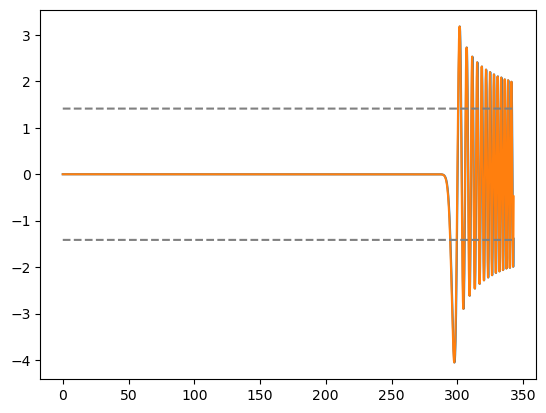

In [7]:
r=np.arange(0,343,0.1)
plt.plot(r,continuumstates_l0_Al27.wavefct_g(r))
plt.plot(r,continuumstates_l0_Al27.wavefct_f(r))
plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
#plt.ylim(-2,2)
#plt.xlim(50,400)